In [1]:
# Da Profile_class_test

%reset
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%qtconsole

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

from dataIO.span import span
from dataIO.fn_add_subfix import fn_add_subfix

from IPython.display import display
from plotting.backends import maximize

In [5]:
pwd

'C:\\Users\\kovor\\Documents\\python\\pyXTel\\pyxsurf\\pyProfile\\test'

# Test pyProfile

## New class implementation (2020/06/25)

Test new implementation of class from profile methods to objects, in analogy to what is done with pySurf.
Here we test and document.

The main class is `Profile`.
Little is implemented for readers, it can be easily initialized with `x` and `y`.

Helper function `make_signal` (see Appendix or `make_signal?` for details) can be used to generate a (sinusoid-based) test profile. 


In [14]:
from pyProfile.profile_class import Profile
from pyProfile.profile import make_signal

In [9]:
Profile?

In [10]:
make_signal?

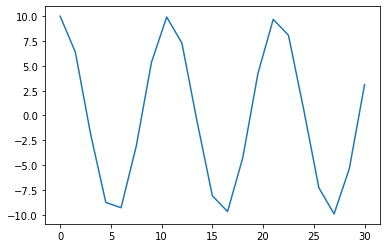

In [44]:
x,y=make_signal(amp=10.,L=30.,N=21,nwaves=2.8,ystartend=(0,0),noise=0)
plt.plot(x,y)

Units can be set. Use Profile methods:

In [45]:
P = Profile(x,y,units=['mm','nm'])

In [46]:
P.std()

7.044127837632114

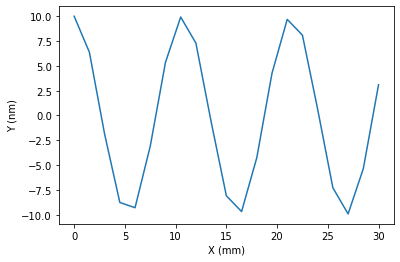

In [47]:
P.plot()

`x` and `y` can be retrieved as `P.x` and `P.y`, or with `x,y = P()`

In [49]:
P()

(array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
        16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ]),
 array([10.        ,  6.3742399 , -1.87381315, -8.7630668 , -9.29776486,
        -3.09016994,  5.35826795,  9.92114701,  7.28968627, -0.6279052 ,
        -8.09016994, -9.68583161, -4.25779292,  4.25779292,  9.68583161,
         8.09016994,  0.6279052 , -7.28968627, -9.92114701, -5.35826795,
         3.09016994]))

In [23]:
#TODO: test remove_nan_ends.
#TODO: test register_profile.

# Test profile functions

## Algebric operations

We build different test profiles.

BEWARE: units in algebraic operations are not verified,
usually the ones from first term are used for result,
this may change in future.

Create two similar quadratic profiles `a` and `b` with different x values: 

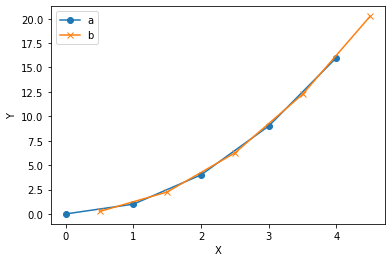

In [35]:
# Make different test profiles:

x0 = np.arange(5)

a = Profile(x0,x0**2)
a.plot(marker='o',ls='-',label = 'a')

b =  Profile(x0+0.5,(x0+0.5)**2)
b.plot(marker='x',ls='-',label = 'b')

plt.legend(loc=0)

Algebraic operations can be performed on `Profile` objects. 

Resampling can be directly accessed by `resample` method, but there is usually no need to perform, because it is automatically handled by algebraic operations (resample on first by default, ):

In [40]:
c = a.resample(b)

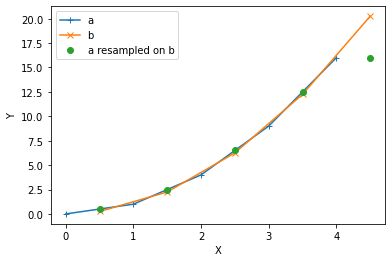

In [41]:
# plot interpolation

a.plot(marker='+',ls='-',label = 'a')
b.plot(marker='x',ls='-',label = 'b')
c.plot(marker='o',ls='',label='a resampled on b')

plt.legend(loc=0)

In [ ]:
Here some examples of algebraic operations on different `x`. 

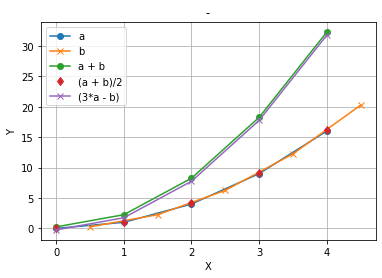

In [72]:

a.plot(marker='o',ls='-', label = 'a')
b.plot(marker='x',ls='-', label = 'b')
(a+b).plot(label = 'a + b',marker='o')
((a+b)/2).plot(label = '(a + b)/2',marker='d',ls='')
(3*a-b).plot(label = '(3*a - b)',marker='x',ls='-')
plt.grid()
plt.legend(loc=0)

Text(0.5, 1.0, 'ratio between interpolated and original')

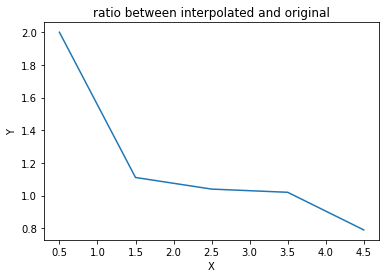

In [69]:
#(a/b).plot(label='a/b')
#(b/a).plot(label='b/a')
(c/b).plot()
plt.title('ratio between interpolated and original')

## Leveling

In [87]:
# riproduce esempio di matlab da:
# https://it.mathworks.com/help/matlab/data_analysis/detrending-data.html
#
#

fn = r'C:\Users\kovor\Documents\python\pyXTel\pyProfile\test\matlab-normaldata.dat'


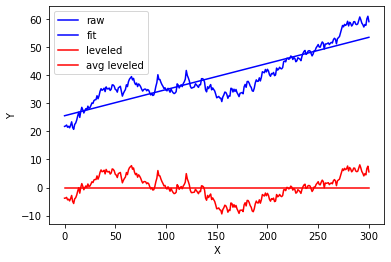

In [101]:
y = np.genfromtxt(fn)
p=Profile(np.arange(len(y)),y)
p.plot(color='b',label = 'raw')
(p-p.level()).plot(color='b',label = 'fit')
p.level().plot(color='r',label = 'leveled')
plt.plot(p.x,p.y*0+p.level().y.mean(),color='r',label = 'avg leveled')
plt.legend()

## Appendix: make_signal

In [25]:
%matplotlib

Creo un segnale (reale). Ne creo una copia sottocampionata per test, ovviamente sono tutti valori reali.

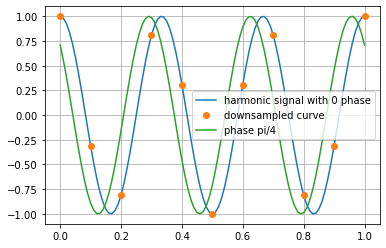

In [26]:
L=1
N=11

plt.clf()
x,y=make_signal(1,L=1,N=101,nwaves=3)
plt.plot(x,y,label='harmonic signal with 0 phase')
x,y=make_signal(1,L=1,N=N,nwaves=3)
plt.plot(x,y,'o',label='downsampled curve')
x,y=make_signal(1,L=1,N=101,nwaves=3,phase=np.pi/4)
plt.plot(x,y,label='phase pi/4')
plt.grid(1)
plt.legend(loc=0)

Quindi ora posso creare segnali complessi arbitrari usando due segnali con stessa frequenza e fase diversa su reale e immaginario.

Questo ovviamente significa che posso usare una serie di ca N/2 armoniche per descrivere interamente il segnale, a patto di fornire anche la fase.

### Option `minus_one`

In [27]:

plt.clf()
A=make_signal(1,L=1,N=N,nwaves=nwaves)
plt.plot(*A)
print(A[0].shape)
print(A[1].shape)

<Figure size 432x288 with 0 Axes>

In [28]:
# redo plot adding "minux_one option"
plt.clf()
plt.plot(*A)

plt.plot(*(make_signal(1,L=1,N=N,nwaves=nwaves,minus_one=True)),'o')

plt.grid(1)
plt.xlim([0.97,1.01])
plt.ylim([-0.2,0.1])
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
# makes a 2d surface from matlab data 
# fit 2D
# estrai profili dritti o in diagonale
